In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Ler o arquivo CSV
df = pd.read_csv("vendas_loja.txt")

In [15]:
# Visualiza as primeiras linhas
print(df.head())

   ID Produto   Categoria        Regiao  Vendas  Mes
0   1  Camisa   Vestuário           Sul  1500.0  Jan
1   2   Calça   Vestuário       Sudeste  2000.0  Jan
2   3   Tênis    Calçados  Centro-Oeste  1450.0  Fev
3   4    Boné  Acessórios         Norte   800.0  Fev
4   5   Meias   Vestuário           Sul  1780.0  Mar


In [20]:
# 2. Tratar valores nulos
# Substitui regiões nulas por 'Indefinida'
df["Regiao"] = df["Regiao"].fillna("Indefinida")

# Substitui vendas nulas pela média da categoria
df["Vendas"] = df.groupby("Categoria")["Vendas"].transform(
    lambda x: x.fillna(x.mean())
)

# Verifica se ainda há nulos
print(df.isnull().sum())

ID           0
Produto      0
Categoria    0
Regiao       0
Vendas       0
Mes          0
dtype: int64


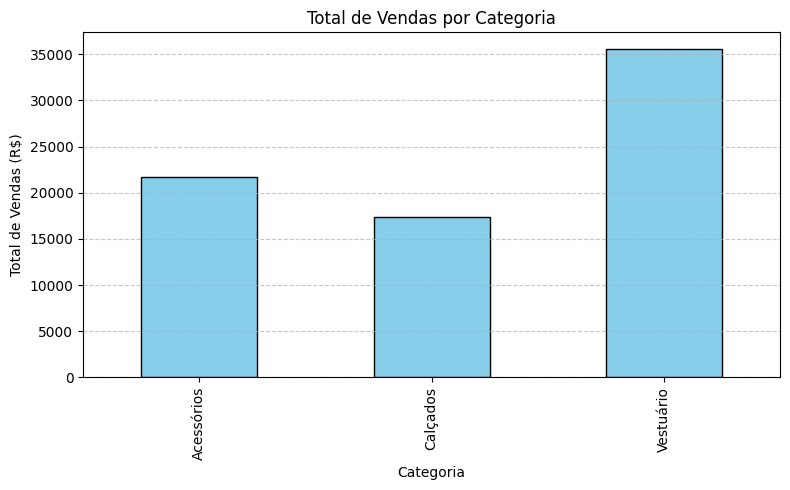

In [17]:
vendas_categoria = df.groupby("Categoria")["Vendas"].sum()

plt.figure(figsize=(8,5))
vendas_categoria.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total de Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Total de Vendas (R$)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

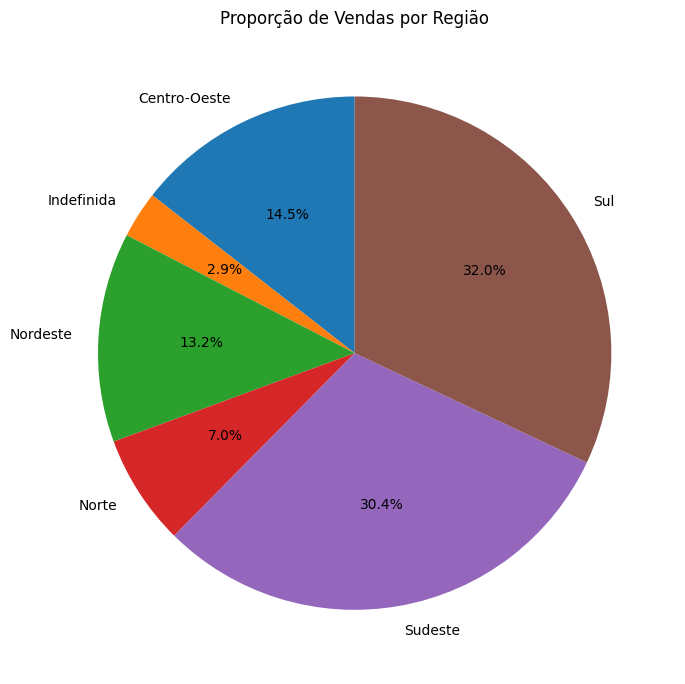

In [18]:
vendas_regiao = df.groupby("Regiao")["Vendas"].sum()

plt.figure(figsize=(7,7))
plt.pie(vendas_regiao, labels=vendas_regiao.index, autopct="%.1f%%", startangle=90)
plt.title("Proporção de Vendas por Região")
plt.tight_layout()
plt.show()


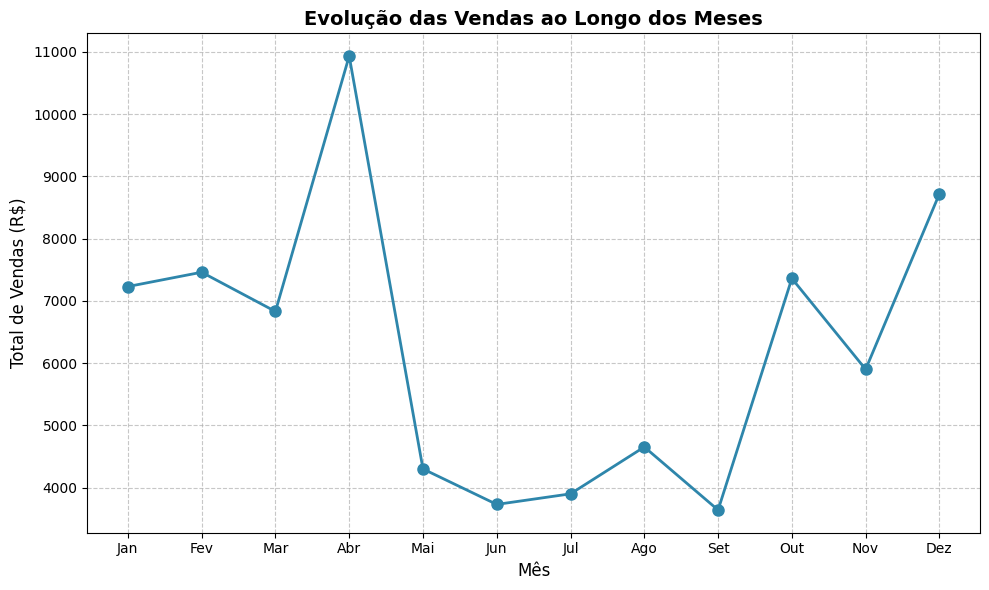

In [21]:
# Define ordem lógica dos meses
ordem_meses = ["Jan","Fev","Mar","Abr","Mai","Jun","Jul","Ago","Set","Out","Nov","Dez"]
df["Mes"] = pd.Categorical(df["Mes"], categories=ordem_meses, ordered=True)

vendas_mes = df.groupby("Mes", observed=True)["Vendas"].sum().sort_index()

plt.figure(figsize=(10,6))
plt.plot(vendas_mes.index, vendas_mes.values, marker="o", linestyle="-",
         linewidth=2, markersize=8, color='#2E86AB')
plt.title("Evolução das Vendas ao Longo dos Meses", fontsize=14, fontweight='bold')
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Total de Vendas (R$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()